# Time Series - Multiple Series example

###### Links: [Walmart dataset (Kaggle)](https://www.kaggle.com/c/m5-forecasting-uncertainty/overview)  |  [Article ()]()

### 0 - Setup

###### Import pckgs 

In [1]:
import warnings
warnings.filterwarnings("ignore")
from ts_utils import *
import datetime

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


###### Import data

In [7]:
dtf = pd.read_csv('data_multiple.csv')
dtf.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,FOODS_3_536_CA_1_validation,FOODS_3_536,FOODS_3,FOODS,CA_1,CA,3,2,2,4,...,3,1,0,3,0,0,2,1,2,1
1,FOODS_3_382_CA_3_validation,FOODS_3_382,FOODS_3,FOODS,CA_3,CA,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,HOUSEHOLD_1_375_WI_1_validation,HOUSEHOLD_1_375,HOUSEHOLD_1,HOUSEHOLD,WI_1,WI,1,0,0,1,...,0,0,2,1,0,1,0,1,2,1
3,FOODS_2_084_CA_3_validation,FOODS_2_084,FOODS_2,FOODS,CA_3,CA,0,0,0,0,...,1,1,1,2,4,3,1,1,6,1
4,FOODS_3_668_CA_1_validation,FOODS_3_668,FOODS_3,FOODS,CA_1,CA,22,9,7,12,...,10,10,8,8,9,10,6,6,10,6


In [3]:
## Randomly reduce number of ts
dtf = dtf.drop_duplicates("item_id", keep='first').sample(1000).reset_index(drop=True)
dtf = dtf.drop(["id","dept_id","state_id","store_id"], axis=1)
dtf.head()

,item_id,cat_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,FOODS_3_487,FOODS,0,0,0,0,0,0,0,0,...,0,3,3,1,3,2,2,3,1,1
1,HOUSEHOLD_2_028,HOUSEHOLD,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
2,HOUSEHOLD_2_138,HOUSEHOLD,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FOODS_3_094,FOODS,0,0,0,0,0,0,0,0,...,0,2,1,3,3,1,0,0,2,3
4,FOODS_2_071,FOODS,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2,0,0,0,0


In [4]:
## Create dates list
cols = dtf.filter(like="d_", axis=1).columns.tolist()
dates = pd.date_range(start=(datetime.datetime.now() - datetime.timedelta(days=len(cols)-1)).strftime("%Y-%m-%d"),
                      end=datetime.datetime.now().strftime("%Y-%m-%d"), 
                      freq='D').astype(str).tolist()
print(dates[0:5], "...", dates[-1])

['2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25'] ... 2020-10-14


In [5]:
## Rename columns
dtf.columns = ["ts","exog",] + dates
dtf.head()

,ts,exog,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,...,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14
0,FOODS_3_487,FOODS,0,0,0,0,0,0,0,0,...,0,3,3,1,3,2,2,3,1,1
1,HOUSEHOLD_2_028,HOUSEHOLD,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
2,HOUSEHOLD_2_138,HOUSEHOLD,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FOODS_3_094,FOODS,0,0,0,0,0,0,0,0,...,0,2,1,3,3,1,0,0,2,3
4,FOODS_2_071,FOODS,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2,0,0,0,0


### 1 - Analysis

In [6]:
'''
'''
def utils_filter_ts(dtf, name, idxs):
    ts = dtf[dtf["ts"]==name][idxs].T
    ts.columns = [name]
    ts.index = pd.to_datetime(ts.index)
    return ts

In [7]:
'''
'''
def summarize_multiple_ts(dtf, by=None, aggs=["mean"], return_all=True):
    ## don't group by
    if by is None:
        summ_dtf = dtf.agg(aggs)
        if "ts" in summ_dtf.columns:
            summ_dtf = summ_dtf.drop("ts", axis=1)
        summ_dtf = summ_dtf.reset_index().rename(columns={"index":"ts"})
            
    ## group by
    else:
        summ_dtf = pd.DataFrame()
        for agg in aggs:
            rows = dtf.groupby(by).agg(agg)
            if "ts" in rows.columns:
                rows = rows.drop("ts", axis=1)
            rows = rows.reset_index().rename(columns={by:"ts"})
            rows["ts"] = rows["ts"].apply(lambda x: str(x)+"_"+str(agg))
            summ_dtf = summ_dtf.append(rows, ignore_index=True)
    
    ## append
    if return_all is True:
        summ_dtf = dtf.append(summ_dtf, ignore_index=True)[dtf.columns]
    return summ_dtf

In [8]:
'''
'''
def plot_multiple_ts(dtf, idxs, color=None, lst_colors=None, lst_highlights=[], legend=False, title=None, figsize=(15,5)):
    data = dtf.copy()
    
    ## set colors
    if color is not None:
        lst_elements = sorted(list(data[color].unique()))
        lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in range(len(lst_elements))] if lst_colors is None else lst_colors
        data["color"] = data[color].apply(lambda x: lst_colors[lst_elements.index(x)])            
    else:
        data["color"] = "black"
        
    ## highlight some specific ts
    if len(lst_highlights) > 0:
        data.loc[data["ts"].isin(lst_highlights), "color"] = "red"
    
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    fig.suptitle(title, fontsize=15)
    lst_legend = []
    for i,row in data.iterrows():
        ts = utils_filter_ts(dtf, row["ts"], idxs)
        ts.plot(ax=ax, legend=False, grid=True, color=row["color"]) 
    
    ## legend
    if legend is True:
        lst_leg = []
        if color is not None:
            lst_leg = lst_leg + [pltpatches.Patch(color=c, label=lst_elements[lst_colors.index(c)]) for c in lst_colors]
        if len(lst_highlights) > 0:
            lst_leg = lst_leg + [pltpatches.Patch(color="red", label=i) for i in lst_highlights]
        
        ax.legend(handles=lst_leg)
    plt.show()

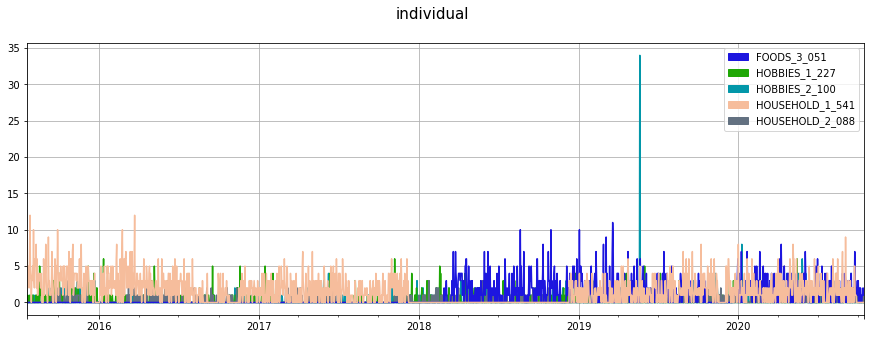

In [9]:
plot_multiple_ts(dtf.sample(5), dates, color="ts", legend=True, title="individual", figsize=(15,5))

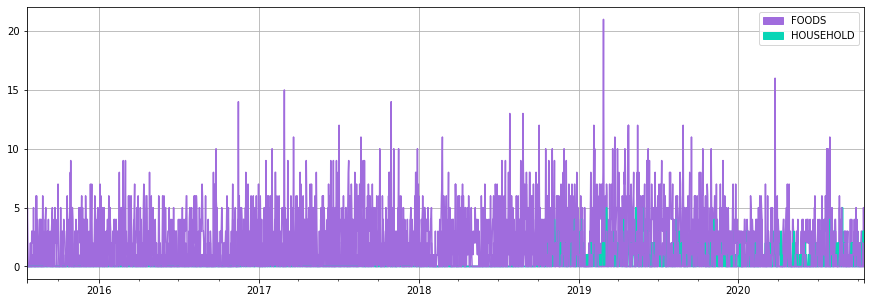

In [10]:
plot_multiple_ts(dtf.sample(5), dates, color="exog", legend=True, figsize=(15,5))

In [11]:
a = summarize_multiple_ts(dtf[dtf["exog"]=="FOODS"], by=None, aggs=["mean"], return_all=True)
a.tail()

,ts,exog,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,...,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14
479,FOODS_3_097,FOODS,11.000000,8.00000,1.000000,7.000000,5.000000,8.000000,7.000000,7.000000,...,8.000000,8.000000,13.000000,8.000000,6.000000,9.000000,13.000000,6.000000,11.000000,20.000000
480,FOODS_3_818,FOODS,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.000000,4.000000,3.000000,6.000000,1.000000,5.000000,7.000000,5.000000,4.000000
481,FOODS_2_195,FOODS,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
482,FOODS_2_346,FOODS,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,2.000000,2.000000,3.000000,5.000000,3.000000,2.000000,9.000000,0.000000,7.000000
483,mean,NaN,2.511387,2.52795,1.556936,1.732919,1.658385,1.898551,2.086957,3.229814,...,1.933747,2.478261,2.929607,2.012422,1.784679,1.797101,1.908903,2.229814,2.766046,3.004141


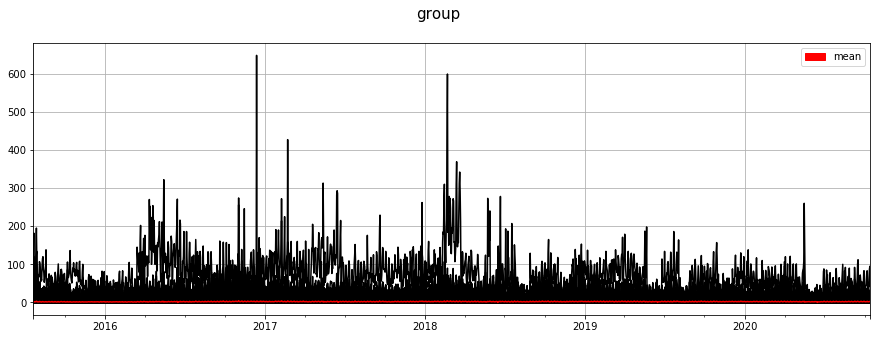

In [12]:
plot_multiple_ts(a, dates, legend=True, title="group", lst_highlights=["mean"], figsize=(15,5))

In [13]:
a = summarize_multiple_ts(dtf, by="exog", aggs=["mean"], return_all=False)
a.tail()

,ts,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,...,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14
0,FOODS_mean,2.511387,2.527950,1.556936,1.732919,1.658385,1.898551,2.086957,3.229814,2.732919,...,1.933747,2.478261,2.929607,2.012422,1.784679,1.797101,1.908903,2.229814,2.766046,3.004141
1,HOBBIES_mean,0.910112,0.567416,0.511236,0.533708,0.455056,0.837079,0.483146,1.438202,0.702247,...,0.646067,1.280899,1.129213,0.865169,0.747191,0.348315,0.488764,0.797753,1.050562,0.837079
2,HOUSEHOLD_mean,0.510324,0.483776,0.353982,0.374631,0.312684,0.374631,0.395280,0.699115,0.457227,...,0.796460,1.011799,1.109145,0.840708,0.734513,0.766962,0.693215,0.823009,1.135693,1.250737


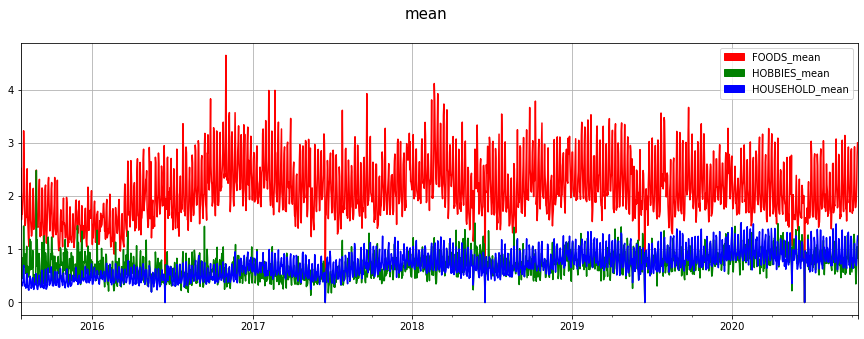

In [14]:
plot_multiple_ts(a, dates, color="ts", lst_colors=["red","green","blue"], legend=True, title="mean", figsize=(15,5))

### 2 - Clustering

In [30]:
a = [utils_filter_ts(dtf, i, dates) for i in dtf["ts"].head(500).values]

In [31]:
from tslearn import clustering, utils as tslearn_utils

In [32]:
model = clustering.TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
model.fit(tslearn_utils.to_time_series_dataset(a))

MemoryError: 

In [ ]:
b = [utils_filter_ts(dtf, i, dates) for i in dtf["ts"].tail(100).values]

In [ ]:
model.predict(to_time_series_dataset(a))

### 3 - Forecasting